In [3]:
library(data.table)
library(tidyverse)
library(gmodels)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.3     √ purrr   0.3.4
√ tibble  3.0.4     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.4.0     √ forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()

Registered S3 method overwritten by 'gdata':
  method         from     
  reorder.factor DescTools



In [4]:
dog = fread('C:/Users/fleur/2021 P-SAT/주제분석/주제분석 2주차/데이터/train_dog.csv', data.table = FALSE)
cat = fread('C:/Users/fleur/2021 P-SAT/주제분석/주제분석 2주차/데이터/train_cat.csv', data.table = FALSE)

In [5]:
dog_indepvar = c('season', 'neuterYN', 'sex', 'color')
dog_target = c('adoptionYN')

cat_indepvar = c('season', 'neuterYN', 'sex')
cat_target = c('adoptionYN')

In [6]:
dog$adoptionYN = dog$adoptionYN %>% as.factor()
dog$season = dog$season %>% as.factor()
dog$neuterYN = dog$neuterYN %>% as.factor()
dog$sex = dog$sex %>% as.factor()
dog$color = dog$color %>% as.factor()
dog$size_google = dog$size_google %>% as.factor()
dog$group_fic = dog$group_fic %>% as.factor()
dog$size_akc = dog$size_akc %>% as.factor()
dog$group_akc = dog$group_akc %>% as.factor()
dog$activity_level = dog$activity_level %>% as.factor()

cat$adoptionYN = cat$adoptionYN %>% as.factor()
cat$season = cat$season %>% as.factor()
cat$neuterYN = cat$neuterYN %>% as.factor()
cat$sex = cat$sex %>% as.factor()
cat$hair = cat$hair %>% as.factor()
cat$color = cat$color %>% as.factor()

In [7]:
cramerV(table(dog$neuterYN, dog$size_akc))

Cramer V 
  0.1677

In [22]:
cramerV(table(cat$hair, cat$color))

Cramer V 
  0.2995

In [7]:
cramerV(table(dog$neuterYN, dog$size_akc))

Cramer V 
  0.1677

In [7]:
cramerV(table(dog$neuterYN, dog$size_akc))

Cramer V 
  0.1677

# 망망이

In [23]:
(9169-9306.526)^2/9306.526 + (5506-5368.474)^2/5368.474 + (9497-9462.534)^2/9462.534 + (5424-5458.466)^2/5458.466 + (8318-8272.186)^2/8272.186 + (4726-4771.814)^2/4771.814 + (8481 - 8423.754)^2/8423.754 + (4802 - 4859.246)^2/4859.246

[1] 7.655515

In [70]:
# (1) 계절 변수
with(dog, CrossTable(season, adoptionYN, expected = TRUE, chisq = TRUE))


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  55923 

 
             | adoptionYN 
      season |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |      9169 |      5506 |     14675 | 
             |  9306.526 |  5368.474 |           | 
             |     2.032 |     3.523 |           | 
             |     0.625 |     0.375 |     0.262 | 
             |     0.259 |     0.269 |           | 
             |     0.164 |     0.098 |           | 
-------------|-----------|-----------|-----------|
           2 |      9497 |      5424 |     14921 | 
             |  9462.534 |  5458.466 |           | 
             |     0.126 |     0.218 |           | 
             |     0.636 |     0.364 |     0.267 | 
            

* 일반횟수  
* 카이 제곱 (기대치 비율)
* 행을 기준으로 비율 값
* 열을 기준으로 비율 값
* 전체를 기준으로 비율 값

귀무가설 H0: 두 변수들(종속변수 & 독립변수) 간에 관계가 없다.  
대립가설 H1: 두 변수들 간 관계가 있다.  

p-value > 0.05,  
입양 유무(adoptionYN)와 계절(season)은 유의수준 0.05에서 관계가 없다.

In [69]:
# (2) 중성화여부 변수
with(dog, CrossTable(neuterYN, adoptionYN, expected = TRUE, chisq = TRUE))


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  55923 

 
             | adoptionYN 
    neuterYN |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |     24245 |     14280 |     38525 | 
             | 24431.614 | 14093.386 |           | 
             |     1.425 |     2.471 |           | 
             |     0.629 |     0.371 |     0.689 | 
             |     0.684 |     0.698 |           | 
             |     0.434 |     0.255 |           | 
-------------|-----------|-----------|-----------|
           1 |       521 |       981 |      1502 | 
             |   952.532 |   549.468 |           | 
             |   195.500 |   338.909 |           | 
             |     0.347 |     0.653 |     0.027 | 
            

입양 유무(adoptionYN)와 중성화여부(neuterYN)은 유의수준 0.05에서 관계가 있다.

In [71]:
# (3) 성별 변수
with(dog, CrossTable(sex, adoptionYN, expected = TRUE, chisq = TRUE))


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  55923 

 
             | adoptionYN 
         sex |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |     16979 |     10185 |     27164 | 
             | 17226.745 |  9937.255 |           | 
             |     3.563 |     6.177 |           | 
             |     0.625 |     0.375 |     0.486 | 
             |     0.479 |     0.498 |           | 
             |     0.304 |     0.182 |           | 
-------------|-----------|-----------|-----------|
           1 |     18065 |     10088 |     28153 | 
             | 17853.945 | 10299.055 |           | 
             |     2.495 |     4.325 |           | 
             |     0.642 |     0.358 |     0.503 | 
            

입양 유무(adoptionYN)와 성별(sex)은 유의수준 0.05에서 관계가 있다.

In [72]:
# (4) 색깔 변수
with(dog, CrossTable(color, adoptionYN, expected = TRUE, chisq = TRUE))


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  55923 

 
             | adoptionYN 
       color |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |      1561 |      1136 |      2697 | 
             |  1710.371 |   986.629 |           | 
             |    13.045 |    22.614 |           | 
             |     0.579 |     0.421 |     0.048 | 
             |     0.044 |     0.056 |           | 
             |     0.028 |     0.020 |           | 
-------------|-----------|-----------|-----------|
           1 |      2781 |      1524 |      4305 | 
             |  2730.126 |  1574.874 |           | 
             |     0.948 |     1.643 |           | 
             |     0.646 |     0.354 |     0.077 | 
            

입양 유무(adoptionYN)와 색깔(color)은 유의수준 0.05에서 관계가 있다.

# 애옹이

In [73]:
# (1) 계절 변수
with(cat, CrossTable(season, adoptionYN, expected = TRUE, chisq = TRUE))


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  21476 

 
             | adoptionYN 
      season |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |      2061 |      2006 |      4067 | 
             |  2541.023 |  1525.977 |           | 
             |    90.681 |   151.000 |           | 
             |     0.507 |     0.493 |     0.189 | 
             |     0.154 |     0.249 |           | 
             |     0.096 |     0.093 |           | 
-------------|-----------|-----------|-----------|
           2 |      6131 |      2767 |      8898 | 
             |  5559.386 |  3338.614 |           | 
             |    58.773 |    97.868 |           | 
             |     0.689 |     0.311 |     0.414 | 
            

p-value > 0.05,  
입양 유무(adoptionYN)와 계절(season)은 유의수준 0.05에서 관계가 있다.

In [74]:
# (2) 중성화여부 변수
with(cat, CrossTable(neuterYN, adoptionYN, expected = TRUE, chisq = TRUE))


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  21476 

 
             | adoptionYN 
    neuterYN |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |      9237 |      6137 |     15374 | 
             |  9605.529 |  5768.471 |           | 
             |    14.139 |    23.544 |           | 
             |     0.601 |     0.399 |     0.716 | 
             |     0.688 |     0.762 |           | 
             |     0.430 |     0.286 |           | 
-------------|-----------|-----------|-----------|
           1 |       224 |       203 |       427 | 
             |   266.786 |   160.214 |           | 
             |     6.862 |    11.426 |           | 
             |     0.525 |     0.475 |     0.020 | 
            

입양 유무(adoptionYN)와 중성화여부(neuterYN)은 유의수준 0.05에서 관계가 있다.

In [75]:
# (3) 성별 변수
with(cat, CrossTable(sex, adoptionYN, expected = TRUE, chisq = TRUE))


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  21476 

 
             | adoptionYN 
         sex |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |      4950 |      3319 |      8269 | 
             |  5166.392 |  3102.608 |           | 
             |     9.064 |    15.092 |           | 
             |     0.599 |     0.401 |     0.385 | 
             |     0.369 |     0.412 |           | 
             |     0.230 |     0.155 |           | 
-------------|-----------|-----------|-----------|
           1 |      4880 |      3284 |      8164 | 
             |  5100.789 |  3063.211 |           | 
             |     9.557 |    15.914 |           | 
             |     0.598 |     0.402 |     0.380 | 
            

입양 유무(adoptionYN)와 성별(sex)은 유의수준 0.05에서 관계가 있다.

In [30]:
dog %>% str()

'data.frame':	55923 obs. of  21 variables:
 $ adoptionYN    : Factor w/ 2 levels "0","1": 1 2 2 1 2 1 1 1 1 1 ...
 $ age           : int  4 4 5 2 3 1 1 1 1 1 ...
 $ kind_spec     : chr  "믹스" "푸들" "푸들" "믹스견" ...
 $ weight_kg     : num  20 4 4.5 11 3.8 0.2 0.2 0.2 0.2 0.2 ...
 $ duration      : int  12 12 12 12 12 12 12 12 12 12 ...
 $ season        : Factor w/ 4 levels "1","2","3","4": 4 4 4 4 4 4 4 4 4 4 ...
 $ neuterYN      : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex           : Factor w/ 3 levels "0","1","2": 1 1 2 2 1 1 2 2 2 2 ...
 $ disease_cnt   : int  0 3 3 0 0 0 0 0 0 0 ...
 $ positives     : int  1 0 0 0 0 0 0 0 0 0 ...
 $ negatives     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ size_google   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ group_fic     : int  0 9 9 0 9 0 0 0 0 0 ...
 $ size_akc      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ group_akc     : int  0 6 6 0 5 0 0 0 0 0 ...
 $ activity_level: int  0 0 0 0 3 0 0 0 0 0 ...
 $ careAddr_dosi : chr  "전라북도 정읍시" "전라북도 군산시" "전라북도 군산

In [31]:
dog$size_google = dog$size_google %>% as.factor()
dog$group_fic = dog$group_fic %>% as.factor()
dog$size_akc = dog$size_akc %>% as.factor()
dog$group_akc = dog$group_akc %>% as.factor()
dog$activity_level = dog$activity_level %>% as.factor()

In [33]:
logis = glm(adoptionYN ~ age + weight_kg + duration + season + neuterYN + sex + disease_cnt + positives + negatives + size_google + group_fic + size_akc + group_akc + activity_level + grdp + economy + hospital_num + color, data = dog, family = binomial)

In [37]:
summary(logis)


Call:
glm(formula = adoptionYN ~ age + weight_kg + duration + season + 
    neuterYN + sex + disease_cnt + positives + negatives + size_google + 
    group_fic + size_akc + group_akc + activity_level + grdp + 
    economy + hospital_num + color, family = binomial, data = dog)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3920  -0.8943  -0.7004   1.1648   2.7647  

Coefficients: (3 not defined because of singularities)
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      6.206e-01  1.433e-01   4.331 1.48e-05 ***
age             -1.258e-01  5.829e-03 -21.581  < 2e-16 ***
weight_kg       -2.123e-02  2.061e-03 -10.302  < 2e-16 ***
duration        -7.607e-02  6.096e-03 -12.478  < 2e-16 ***
season2         -9.001e-02  2.599e-02  -3.464 0.000533 ***
season3         -7.803e-02  2.688e-02  -2.903 0.003693 ** 
season4         -9.145e-02  2.668e-02  -3.428 0.000609 ***
neuterYN1        3.163e-01  6.443e-02   4.910 9.13e-07 ***
neuterYN2       -2.17

In [36]:
step_logis = step(logis, direction = 'both')

Start:  AIC=65808
adoptionYN ~ age + weight_kg + duration + season + neuterYN + 
    sex + disease_cnt + positives + negatives + size_google + 
    group_fic + size_akc + group_akc + activity_level + grdp + 
    economy + hospital_num + color

                 Df Deviance   AIC
- economy         1    65702 65806
<none>                 65702 65808
- disease_cnt     1    65709 65813
- sex             2    65712 65814
- size_akc        4    65716 65814
- season          3    65719 65819
- size_google     2    65729 65831
- activity_level  4    65743 65841
- grdp            1    65741 65845
- hospital_num    1    65741 65845
- group_fic       9    65760 65848
- group_akc       7    65764 65856
- weight_kg       1    65811 65915
- neuterYN        2    65834 65936
- duration        1    65867 65971
- color           7    65897 65989
- negatives       1    65937 66041
- positives       1    66039 66143
- age             1    66196 66300

Step:  AIC=65806.39
adoptionYN ~ age + weight_kg + dura

In [39]:
step_logis_back = step(logis, direction = 'backward')

Start:  AIC=65808
adoptionYN ~ age + weight_kg + duration + season + neuterYN + 
    sex + disease_cnt + positives + negatives + size_google + 
    group_fic + size_akc + group_akc + activity_level + grdp + 
    economy + hospital_num + color

                 Df Deviance   AIC
- economy         1    65702 65806
<none>                 65702 65808
- disease_cnt     1    65709 65813
- sex             2    65712 65814
- size_akc        4    65716 65814
- season          3    65719 65819
- size_google     2    65729 65831
- activity_level  4    65743 65841
- grdp            1    65741 65845
- hospital_num    1    65741 65845
- group_fic       9    65760 65848
- group_akc       7    65764 65856
- weight_kg       1    65811 65915
- neuterYN        2    65834 65936
- duration        1    65867 65971
- color           7    65897 65989
- negatives       1    65937 66041
- positives       1    66039 66143
- age             1    66196 66300

Step:  AIC=65806.39
adoptionYN ~ age + weight_kg + dura

In [41]:
chisq.test(dog$season, dog$neuterYN)


	Pearson's Chi-squared test

data:  dog$season and dog$neuterYN
X-squared = 31.086, df = 6, p-value = 2.441e-05


In [42]:
chisq.test(dog$season, dog$sex)


	Pearson's Chi-squared test

data:  dog$season and dog$sex
X-squared = 31.802, df = 6, p-value = 1.781e-05


In [43]:
chisq.test(dog$season, dog$color)


	Pearson's Chi-squared test

data:  dog$season and dog$color
X-squared = 53.173, df = 21, p-value = 0.0001299


In [44]:
chisq.test(dog$neuterYN, dog$sex)


	Pearson's Chi-squared test

data:  dog$neuterYN and dog$sex
X-squared = 2467.3, df = 4, p-value < 2.2e-16


In [45]:
chisq.test(dog$neuterYN, dog$color)


	Pearson's Chi-squared test

data:  dog$neuterYN and dog$color
X-squared = 180.83, df = 14, p-value < 2.2e-16


In [46]:
chisq.test(dog$sex, dog$color)


	Pearson's Chi-squared test

data:  dog$sex and dog$color
X-squared = 33.417, df = 14, p-value = 0.002508


In [47]:
chisq.test(cat$season, cat$neuterYN)


	Pearson's Chi-squared test

data:  cat$season and cat$neuterYN
X-squared = 212.82, df = 6, p-value < 2.2e-16


In [48]:
chisq.test(cat$season, cat$sex)


	Pearson's Chi-squared test

data:  cat$season and cat$sex
X-squared = 63.314, df = 6, p-value = 9.526e-12


In [49]:
chisq.test(cat$neuterYN, cat$sex)


	Pearson's Chi-squared test

data:  cat$neuterYN and cat$sex
X-squared = 1196.5, df = 4, p-value < 2.2e-16


In [51]:
chisq.test(table(dog$season, dog$sex))


	Pearson's Chi-squared test

data:  table(dog$season, dog$sex)
X-squared = 31.802, df = 6, p-value = 1.781e-05


In [2]:
library('rcompanion')

Warning message:
"package 'rcompanion' was built under R version 4.0.5"


In [57]:
cramerV(table(dog$neuterYN, dog$sex))

Cramer V 
  0.1485

In [58]:
cramerV(table(dog$neuterYN, dog$color))

Cramer V 
 0.04021

In [59]:
cramerV(table(dog$sex, dog$color))

Cramer V 
 0.01729

In [60]:
cramerV(table(cat$season, cat$neuterYN))

Cramer V 
 0.07039

In [61]:
cramerV(table(cat$season, cat$sex))

Cramer V 
 0.03839

In [62]:
cramerV(table(cat$neuterYN, cat$sex))

Cramer V 
  0.1669

In [68]:
cramerV(table(dog$adoptionYN, dog$sex))

Cramer V 
 0.02162

In [78]:
library(CORElearn)

Warning message:
"package 'CORElearn' was built under R version 4.0.5"


In [94]:
RE = attrEval(adoptionYN ~ weight_kg + neuterYN + sex + positives + negatives + size_akc + group_akc + activity_level + grdp + economy + hospital_num + color, data = dog,estimator='Relief',ReliefIterations=30)

In [95]:
SRE = sort(RE, decreasing = T)
SRE

economy          color   hospital_num      weight_kg            sex 
   0.035607735    0.033333333    0.028819444    0.004009164    0.000000000 
     negatives       size_akc      group_akc activity_level           grdp 
   0.000000000    0.000000000    0.000000000    0.000000000   -0.010963093 
      neuterYN      positives 
  -0.066666667   -0.066666667

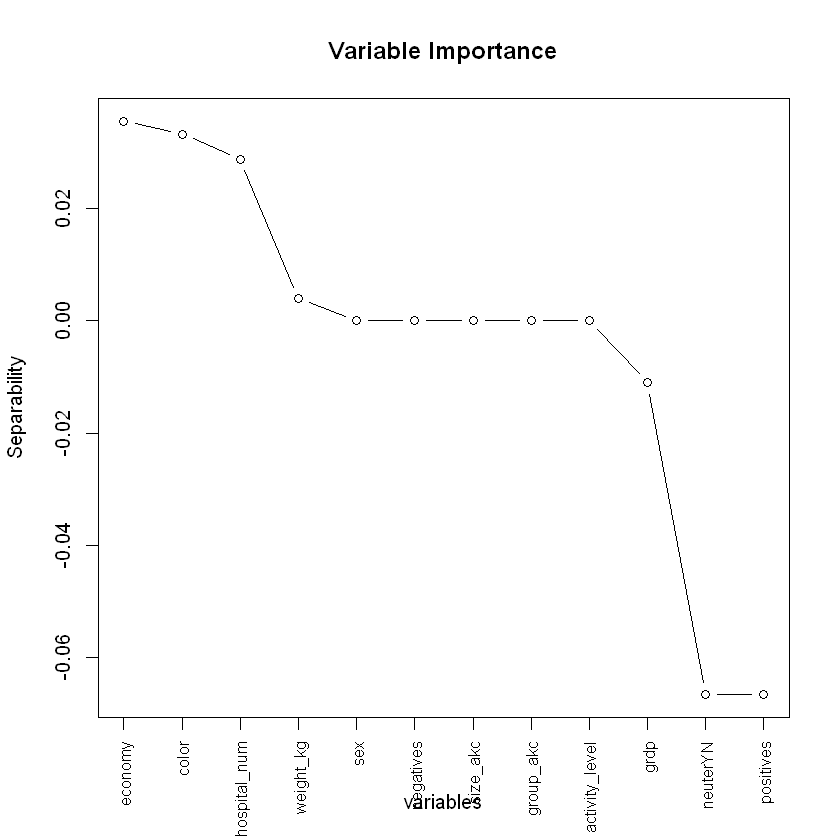

In [96]:
plot(1:length(SRE),SRE, type='b', ylab='Separability', xlab ='variables', main='Variable Importance', xaxt='n')
axis(side=1, at=1:length(SRE), labels=names(SRE), cex.axis=0.8,las=2)

In [ ]:
adoptionYn ~ age + season + neuterYN + sex + disease_cnt + positives + negatives + hair + grdp + economy + hospital_num + color 

In [91]:
catRE = attrEval(adoptionYN ~ age + season + neuterYN + sex + disease_cnt + positives + negatives + hair + grdp + economy + hospital_num + color, data = cat,estimator='Relief',ReliefIterations=30)

In [92]:
catSRE = sort(catRE, decreasing = T)
catSRE

season    negatives        color  disease_cnt          sex         hair 
  0.13333333   0.06666667   0.06666667   0.05238095   0.03333333   0.03333333 
     economy          age     neuterYN         grdp    positives hospital_num 
  0.03315983   0.01282051   0.00000000  -0.01084080  -0.03333333  -0.06649306

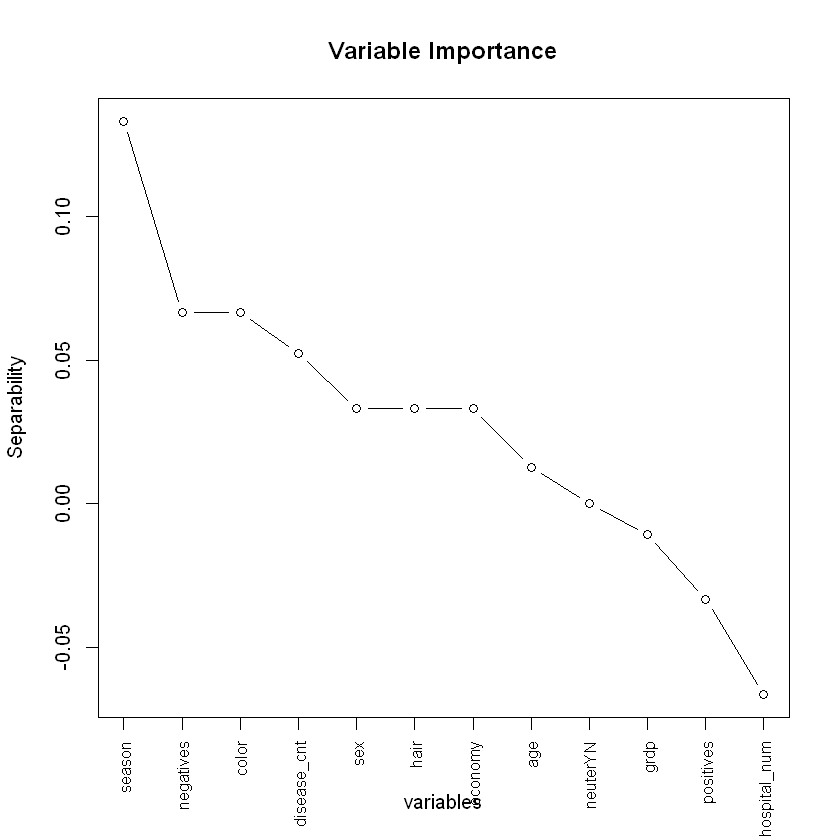

In [93]:
plot(1:length(catSRE),catSRE, type='b', ylab='Separability', xlab ='variables', main='Variable Importance', xaxt='n')
axis(side=1, at=1:length(catSRE), labels=names(catSRE), cex.axis=0.8,las=2)

In [ ]:
########################################################################################

In [98]:
library(vcd)

Warning message:
"package 'vcd' was built under R version 4.0.5"
Loading required package: grid



In [100]:
table(dog$adoptionYN, dog$sex)

   
        0     1     2
  0 16979 18065   421
  1 10185 10088   185

In [99]:
assocstats(table(dog$adoptionYN, dog$sex))

                    X^2 df   P(> X^2)
Likelihood Ratio 26.380  2 1.8690e-06
Pearson          26.134  2 2.1135e-06

Phi-Coefficient   : NA 
Contingency Coeff.: 0.022 
Cramer's V        : 0.022 

In [110]:
library(fmsb)


Attaching package: 'fmsb'


The following objects are masked from 'package:epitools':

    oddsratio, rateratio, riskratio


The following object is masked from 'package:vcd':

    oddsratio




In [113]:
table(dog$adoptionYN, dog$)

   
        0     1     2
  0 16979 18065   421
  1 10185 10088   185

In [114]:
oddsratio.wald(table(dog$adoptionYN, dog$sex))

ERROR: Error in fisher.test(xx): FEXACT error 6.  LDKEY=271 is too small for this problem,
  (ii := key2[itp=284] = 719870047, ldstp=8130)
Try increasing the size of the workspace and possibly 'mult'
